In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import seaborn as sns
import yfinance as yf

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import backtrader.feeds as btfeed
import backtrader as bt
#import backtrader.avanyzers as btanalyzers
%matplotlib inline
import datetime
from datetime import timedelta
from datetime import date


import backtrader.analyzers as btanalyzers
import backtrader.feeds as btfeeds
import backtrader.strategies as btstrats

In [2]:
def candle_analysis_frame(ticker, start, end, ratio):
    data = web.DataReader(ticker, 'yahoo', start, end)
    
    #Wick and Body Sizes
    data['up_wick_size'] =  np.where((data['Open']>data['Close']), abs(data['High']-data['Open']), 
                                     abs(data['High']-data['Close']))      
    data['down_wick_size'] = np.where((data['Open']>data['Close']), abs(data['Close']-data['Low']), 
                                      abs(data['Open']-data['Low']))
    data['body_size'] = abs(data['Open']-data['Close'])
    
    #Hammer if DownWick > ratio * Body and UpWick, opposite for Hanging Man
    data['Hammer'] = np.where((data['down_wick_size'] > ratio*data['up_wick_size']) 
                              & (data['down_wick_size'] > data['body_size']*ratio),1,0)
    data['Hanging Man'] = np.where((data['up_wick_size'] > ratio*data['down_wick_size']) 
                              & (data['up_wick_size'] > data['body_size']*ratio),1,0)
    
    #Change CLose->Open, then returns over next 10 days
    data['Next Day Change'] = (data['Close'].shift(-1) - data['Open'].shift(-1))*100/data['Open'].shift(-1)
    for n in range(0, 30):
        data[str(n)+" Days Returns"] = (data['Close'].shift(-n) - data['Close'])*100/data['Close']
    
    hammer_data = data[data['Hammer']==1]
    h_ret = pd.DataFrame()
    for n in range(0,30):
        h_ret[str(n)] = hammer_data[str(n)+' Days Returns'].copy()
    
    hanging_data = data[data['Hanging Man']==1]
    hm_ret = pd.DataFrame()
    for n in range(0,30):
        hm_ret[str(n)] = hanging_data[str(n)+' Days Returns'].copy()
    
    return data, h_ret, hm_ret

def plot_returns(hammer):
    sns.set_style('darkgrid')
    fig = plt.figure(figsize =(15,7))
    plt.xlabel("Days since Trade")
    plt.ylabel("Percentage Return")
    plt.title("Cumulative 30 day average returns after a trade")
    plt.plot(hammer.mean(), color='g')
    plt.axhline(0, color='k', linewidth=1)
    return

def plot_deviations(hammer):
    sns.set_style('darkgrid')
    fig = plt.figure(figsize =(15,7))
    plt.xlabel("Days since Trade")
    plt.ylabel("Percentage Return")
    plt.title("Representing the spread of the returns over the 30 days post trade")
    plt.plot(hammer.max(), color='g', alpha=0.4)
    plt.plot(hammer.min(), color='g', alpha=0.4)
    plt.plot(hammer.mean(), color='g')
    plt.plot(hammer.mean() + hammer.std(), color='g', alpha=0.7)
    plt.plot(hammer.mean() - hammer.std(), color='g', alpha=0.7)
    plt.axhline(0, color='k', linewidth=1)
    return

def hammer_analysis(ticker, start, end, ratio):
    temp = candle_analysis_frame(ticker, start, end, ratio)
    plot_returns(temp[1])
    plot_deviations(temp[1])

def hanging_man_analysis(ticker, start, end, ratio):
    temp = candle_analysis_frame(ticker, start, end, ratio)
    plot_returns(temp[2])
    plot_deviations(temp[2])

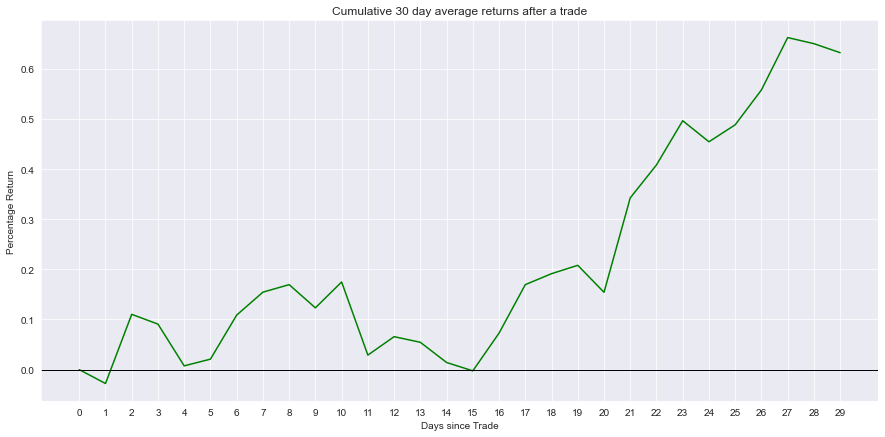

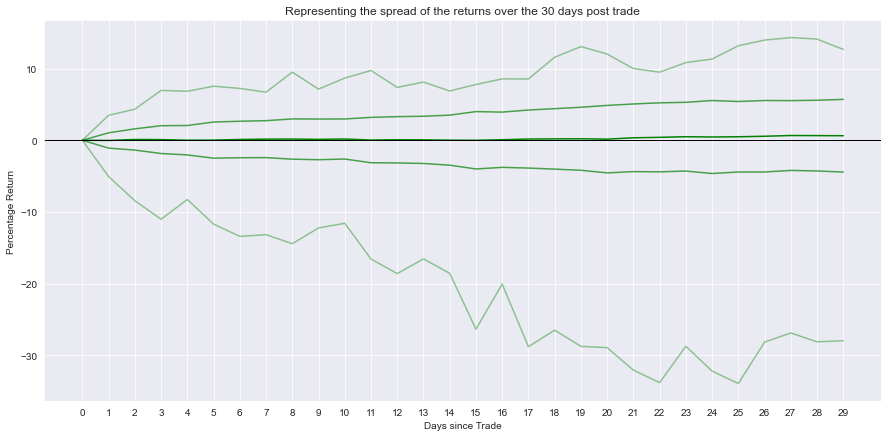

In [3]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2021, 9, 9)

hammer_analysis('SPY', start, end, 3)

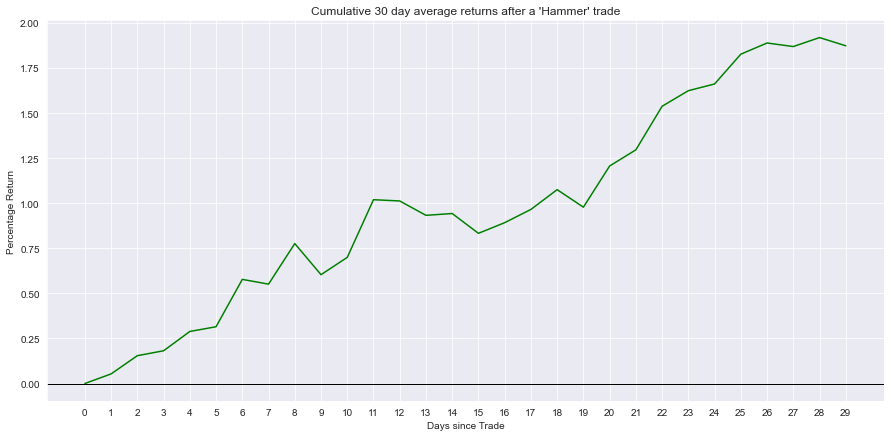

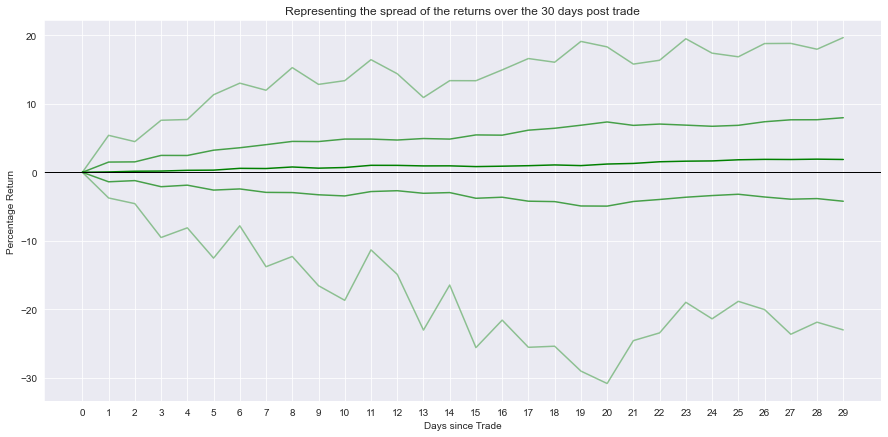

In [6]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2021, 1, 1)

hanging_man_analysis('SPY', start, end, 3)

In [54]:
#def candle_analysis_frame1(ticker, start, end, up_body_hammer_ratio, down_body_hammer_ratio):
#    data = web.DataReader('BP.L', 'yahoo', start, end)
#    data['up_wick_size'] =  np.where((data['Open']>data['Close']), data['High']-data['Open'], data['High']-data['Close'])
#    data['down_wick_size'] = np.where((data['Open']>data['Close']), data['Close']-data['Low'], data['Open']-data['Low'])
#    data['body_size'] = abs(data['Open']-data['Close'])
#    data['Hammer'] = np.where((data['up_wick_size'] > up_body_hammer_ratio*data['body_size']) & (down_body_hammer_ratio*data['down_wick_size']<data['body_size']),1,0)
#    data['Hanging Man'] = np.where((data['up_wick_size'] < up_body_hammer_ratio*data['body_size']) & (down_body_hammer_ratio*data['down_wick_size']>data['body_size']),1,0)
#    data['Next Day Return'] = data['Close'].shift(-1) - data['Open'].shift(-1)
#    return(data)


#BP = candle_analysis_frame1('BP.L', start, end, 5, 5)

#BP[['Next Day Return', 'Hammer']].corr() * 100

#date = datetime.datetime(2000, 1, 1)
#newdate = date+datetime.timedelta(days=5)
#data = web.DataReader('BP.L', 'yahoo', start, start+datetime.timedelta(days=2))
#date = datetime.datetime(2002,10,3)
#number = [0,1,2,3,4,5,6]
#for n in number:
#    newdate = date+datetime.timedelta(days=5)
#    data = web.DataReader('BP.L', 'yahoo', date, newdate)

In [ ]:
#def candle_analysis_frame(ticker, start, end, ratio):
#    data = web.DataReader(ticker, 'yahoo', start, end)
#    
#    #Wick and Body Sizes
#    data['up_wick_size'] =  np.where((data['Open']>data['Close']), abs(data['High']-data['Open']), abs(data['High']-data['Close']))      
#    data['down_wick_size'] = np.where((data['Open']>data['Close']), abs(data['Close']-data['Low']), abs(data['Open']-data['Low']))
#    data['body_size'] = abs(data['Open']-data['Close'])
#    
#    #Hammer if DownWick > ratio * Body and UpWick, opposite for Hanging Man
#    data['Hammer'] = np.where((data['down_wick_size'] > ratio*data['up_wick_size']) 
#                              & (data['down_wick_size'] > data['body_size']*ratio),1,0)
#    data['Hanging Man'] = np.where((data['up_wick_size'] > ratio*data['down_wick_size']) 
#                              & (data['up_wick_size'] > data['body_size']*ratio),1,0)
#    
#    #Change CLose->Open, then returns over next 4 days
#    data['Next Day Change'] = data['Close'].shift(-1) - data['Open'].shift(-1)
#    for n in range(0, 5):
#        data[str(n)+" Days Returns"] = data['Close'].shift(-n) - data['Close']
#    hanging_data = data[data['Hanging Man']==1]
#    hm_ret = [hanging_data['0 Days Returns'].mean(), hanging_data['1 Days Returns'].mean(), 
#              hanging_data['2 Days Returns'].mean(), hanging_data['3 Days Returns'].mean(), hanging_data['4 Days Returns'].mean()]
#    hammer_data = data[data['Hammer']==1]
#    h_ret = [hammer_data['0 Days Returns'].mean(), hammer_data['1 Days Returns'].mean(), 
#             hammer_data['2 Days Returns'].mean(), hammer_data['3 Days Returns'].mean(), hammer_data['4 Days Returns'].mean()]
#    
#    plt.plot(h_ret)
#    plt.plot(hm_ret)
#    return data, hm_ret, h_ret

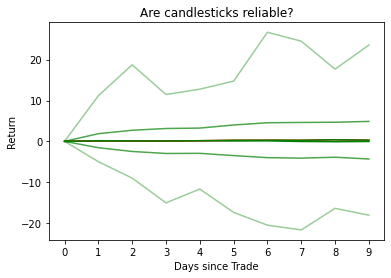

In [63]:
def perc_candle_analysis_frame(ticker, start, end, ratio):
    data = web.DataReader(ticker, 'yahoo', start, end)
    
    #Wick and Body Sizes
    data['up_wick_size'] =  np.where((data['Open']>data['Close']), abs(data['High']-data['Open']), abs(data['High']-data['Close']))      
    data['down_wick_size'] = np.where((data['Open']>data['Close']), abs(data['Close']-data['Low']), abs(data['Open']-data['Low']))
    data['body_size'] = abs(data['Open']-data['Close'])
    
    #Hammer if DownWick > ratio * Body and UpWick, opposite for Hanging Man
    data['Hammer'] = np.where((data['down_wick_size'] > ratio*data['up_wick_size']) 
                              & (data['down_wick_size'] > data['body_size']*ratio),1,0)
    data['Hanging Man'] = np.where((data['up_wick_size'] > ratio*data['down_wick_size']) 
                              & (data['up_wick_size'] > data['body_size']*ratio),1,0)
    
    #Change CLose->Open, then returns over next 10 days
    data['Next Day Change'] = (data['Close'].shift(-1) - data['Open'].shift(-1))*100/data['Open'].shift(-1)
    for n in range(0, 10):
        data[str(n)+" Days Returns"] = (data['Close'].shift(-n) - data['Close'])*100/data['Close']
    
    hammer_data = data[data['Hammer']==1]
    h_ret = pd.DataFrame()
    for n in range(0,10):
        h_ret[str(n)] = hammer_data[str(n)+' Days Returns'].copy()
    
    hanging_data = data[data['Hanging Man']==1]
    hm_ret = pd.DataFrame()
    for n in range(0,10):
        hm_ret[str(n)] = hanging_data[str(n)+' Days Returns'].copy()
    
    
    return data, h_ret, hm_ret

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2021, 1, 1)
ticker = 'BP.L'
TSLA = perc_candle_analysis_frame('BP.L', start, end, 3)

TSLA[1].min()

plot_returns(TSLA[1], TSLA[2])

    
plot_deviations(TSLA[2])

In [4]:
#SPY = yf.download('SPY',start="2021-05-01",interval = "1h") 
#SPY = bt.feeds.PandasData(dataname=SPY, timeframe=bt.TimeFrame.Minutes, compression=60)


SPY = yf.download('SPY',start="2000-01-01") 
SPY = bt.feeds.PandasData(dataname=SPY, plot=True)

class Hammers(bt.Strategy):
    def __init__(self):   
        self.count = 0
        hammer = 0
        ratio = 3
        
    def next(self):
        
        up_wick_size =  np.where((SPY.open[0]>SPY.close[0]), abs(SPY.high[0]-SPY.open[0]), abs(SPY.high[0]-SPY.close[0]))      
        down_wick_size = np.where((SPY.open[0]>SPY.close[0]), abs(SPY.close[0]-SPY.low[0]), abs(SPY.open[0]-SPY.low[0]))
        body_size = abs(SPY.open[0]-SPY.close[0])
        
        Hammer = np.where((down_wick_size > 3*up_wick_size) & (down_wick_size > body_size*3),1,0) 
        
        if Hammer==1:
            self.buy()
            self.count += 1
        
        if self.position.size > 0:
            self.count += 1
        
        if self.count >= 30:
            self.sell()
            self.count = 0

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>


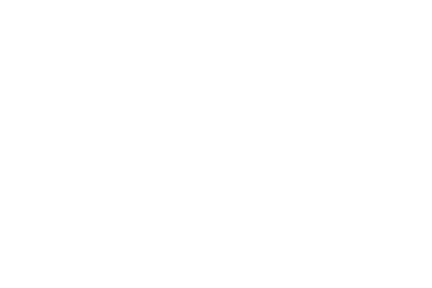

[[<Figure size 432x288 with 4 Axes>]]

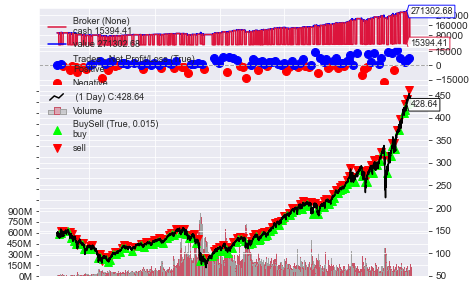

In [10]:
%matplotlib inline    
cerebro = bt.Cerebro()
cerebro.adddata(SPY)
cerebro.addstrategy(Hammers)
cerebro.broker.setcash(100000)
cerebro.addsizer(bt.sizers.PercentSizer, percents=95)
#cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')
cerebro.addanalyzer(btanalyzers.DrawDown, _name='dd')
result = cerebro.run(stdstats=True)
%matplotlib inline
cerebro.plot()

In [26]:
result[0].analyzers.dd.get_analysis()

AutoOrderedDict([('len', 13),
                 ('drawdown', 1.6169648434054575),
                 ('moneydown', 4555.620049738674),
                 ('max',
                  AutoOrderedDict([('len', 2478),
                                   ('drawdown', 36.078870635559504),
                                   ('moneydown', 40674.39166969477)]))])

In [6]:
print('Final Value:',cerebro.broker.getvalue())

print('Sharpe Ratio:', result[0].analyzers.mysharpe.get_analysis())
print('Draw Down:', result[0].analyzers.dd.get_analysis())

Final Value: 271302.67791404715
Sharpe Ratio: OrderedDict([('sharperatio', 0.4251826491849784)])
Draw Down: AutoOrderedDict([('len', 21), ('drawdown', 3.7042406260519685), ('moneydown', 10436.289282306563), ('max', AutoOrderedDict([('len', 2478), ('drawdown', 36.078870635559504), ('moneydown', 40674.39166969477)]))])
